Kütüphane importları (Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, Tensorflow)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tensorflow import keras

Google Colab - Google Drive arası bağlantı

In [2]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
%cd "/content/gdrive/MyDrive/kaggle/"

/content/gdrive/MyDrive/kaggle


Veri setinin Colab geçici diskine aktarılması

In [4]:
%mkdir -p /content/dog-breed-classification

In [5]:
%cp dog-breed-classification/dog-breed-classification.zip /content/dog-breed-classification

Geçici konuma taşınan veri setine geçiş

In [6]:
%cd /content/dog-breed-classification/

/content/dog-breed-classification


Veri setinin klasöre çıkartılması

In [7]:
!unzip -o -q ./dog-breed-classification.zip

Veri seti klasör hiyerarşisinin listelenmesi

In [8]:
%ls -l

total 733912
-rw------- 1 root root 724495926 Nov 29 10:07 dog-breed-classification.zip
-rw-r--r-- 1 root root    482063 Dec 11  2019 labels.csv
-rw-r--r-- 1 root root  25200295 Dec 11  2019 sample_submission.csv
drwxr-xr-x 2 root root    679936 Nov 29 10:07 test/
drwxr-xr-x 2 root root    659456 Nov 29 10:07 train/


Etiketleri okuma

In [9]:
labels = pd.read_csv('labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


Toplam veri sayısı

In [10]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


Etiketler (köpek türleri)

In [11]:
labels["breed"].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

Etiketlerin sonuna dosya uzantısını ekleme (CSV dosyası yardımıyla train ve validation veri setleri okunacak ve işlenecek)

In [12]:
labels['id'] = labels['id'].apply(lambda x: x + '.jpg')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07.jpg,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97.jpg,dingo
2,001cdf01b096e06d78e9e5112d419397.jpg,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d.jpg,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62.jpg,golden_retriever


ImageDataGenerator ve flow_from_dataframe fonksiyonları ile proje PDF'inde bahsedilen gerekli işlemlerin yapılması

In [13]:
data_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

In [14]:
train_generator = data_generator.flow_from_dataframe(labels, directory='./train/', x_col='id', y_col='breed', target_size=(224, 224), class_mode='categorical', batch_size=128, shuffle=True, subset='training')
val_generator = data_generator.flow_from_dataframe(labels, directory='./train/', x_col='id', y_col='breed', target_size=(224, 224), class_mode='categorical', batch_size=128, shuffle=True, subset='validation')

Found 8178 validated image filenames belonging to 120 classes.
Found 2044 validated image filenames belonging to 120 classes.


Train veri setindeki ilk sekiz görselin gösterilmesi

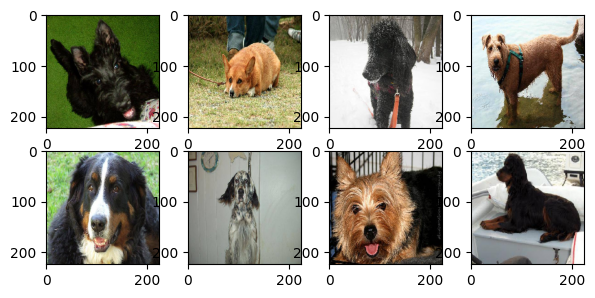

In [15]:
img, label = next(train_generator)

fig = plt.figure(figsize=(7, 5))

for i in range(8):
    fig.add_subplot(3, 4, i+1)
    plt.imshow(img[i])

Validation veri setindeki ilk sekiz görselin gösterilmesi

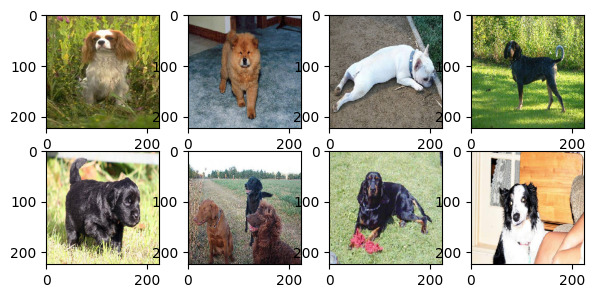

In [16]:
img, label = next(val_generator)

fig = plt.figure(figsize=(7, 5))

for i in range(8):
    fig.add_subplot(3, 4, i+1)
    plt.imshow(img[i])

CNN modelin oluşturulması (Sequential model, 224x224x3 görsel alır)

In [17]:
model = keras.models.Sequential([
    keras.Input(shape=(224, 224, 3)),
    keras.layers.Conv2D(16, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.5),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.5),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(.5),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0

Model compile işlemi

In [18]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(), metrics=["accuracy"])

Birinci model eğitimi

In [19]:
history1 = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
64/64 [==============================] - 49s 587ms/step - loss: 4.7934 - accuracy: 0.0116 - val_loss: 4.7846 - val_accuracy: 0.0137
Epoch 2/10
64/64 [==============================] - 34s 533ms/step - loss: 4.7757 - accuracy: 0.0117 - val_loss: 4.7827 - val_accuracy: 0.0142
Epoch 3/10
64/64 [==============================] - 32s 502ms/step - loss: 4.7674 - accuracy: 0.0153 - val_loss: 4.7812 - val_accuracy: 0.0166
Epoch 4/10
64/64 [==============================] - 32s 502ms/step - loss: 4.7553 - accuracy: 0.0174 - val_loss: 4.7767 - val_accuracy: 0.0181
Epoch 5/10
64/64 [==============================] - 32s 506ms/step - loss: 4.7351 - accuracy: 0.0210 - val_loss: 4.7676 - val_accuracy: 0.0210
Epoch 6/10
64/64 [==============================] - 36s 561ms/step - loss: 4.6987 - accuracy: 0.0235 - val_loss: 4.7532 - val_accuracy: 0.0196
Epoch 7/10
64/64 [==============================] - 32s 507ms/step - loss: 4.6461 - accuracy: 0.0280 - val_loss: 4.7254 - val_accuracy: 0.0210

Birinci model eğitimi sonuçları (Accuracy ve Loss)

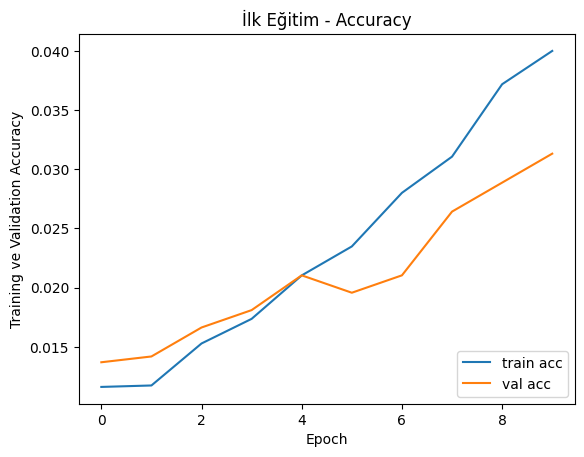

In [20]:
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.title("İlk Eğitim - Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Training ve Validation Accuracy')
plt.legend(loc='lower right')

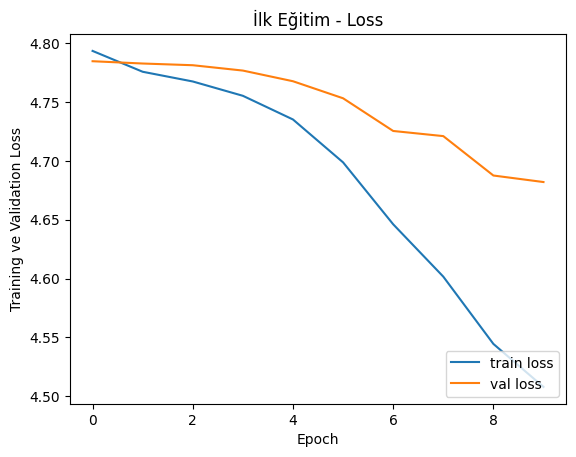

In [21]:
plt.plot(history1.history['loss'], label='train loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.title("İlk Eğitim - Loss")
plt.xlabel('Epoch')
plt.ylabel('Training ve Validation Loss')
plt.legend(loc='lower right')

İkinci eğitim için modelin çoğaltılması ve hiperparametre değişimi (SGD -> Adam optimizer)

In [22]:
model2 = keras.models.clone_model(model)
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0

In [23]:
model2.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(), metrics=["accuracy"])

İkinci model eğitimi

In [24]:
history2 = model2.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
64/64 [==============================] - 40s 571ms/step - loss: 5.1331 - accuracy: 0.0104 - val_loss: 4.7874 - val_accuracy: 0.0073
Epoch 2/10
64/64 [==============================] - 33s 509ms/step - loss: 4.7720 - accuracy: 0.0131 - val_loss: 4.7624 - val_accuracy: 0.0142
Epoch 3/10
64/64 [==============================] - 37s 580ms/step - loss: 4.6844 - accuracy: 0.0249 - val_loss: 4.6979 - val_accuracy: 0.0240
Epoch 4/10
64/64 [==============================] - 32s 505ms/step - loss: 4.4821 - accuracy: 0.0494 - val_loss: 4.6204 - val_accuracy: 0.0318
Epoch 5/10
64/64 [==============================] - 33s 513ms/step - loss: 4.2446 - accuracy: 0.0742 - val_loss: 4.5021 - val_accuracy: 0.0445
Epoch 6/10
64/64 [==============================] - 33s 511ms/step - loss: 3.9503 - accuracy: 0.1219 - val_loss: 4.4306 - val_accuracy: 0.0631
Epoch 7/10
64/64 [==============================] - 32s 507ms/step - loss: 3.5753 - accuracy: 0.1818 - val_loss: 4.4429 - val_accuracy: 0.0523

İkinci model eğitimi sonuçları (Accuracy ve Loss)

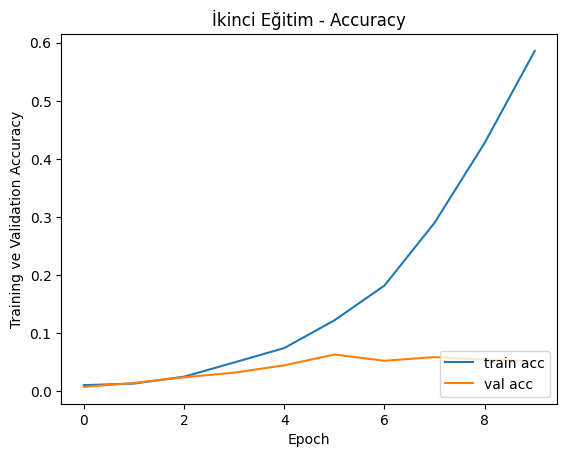

In [25]:
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.title("İkinci Eğitim - Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Training ve Validation Accuracy')
plt.legend(loc='lower right')

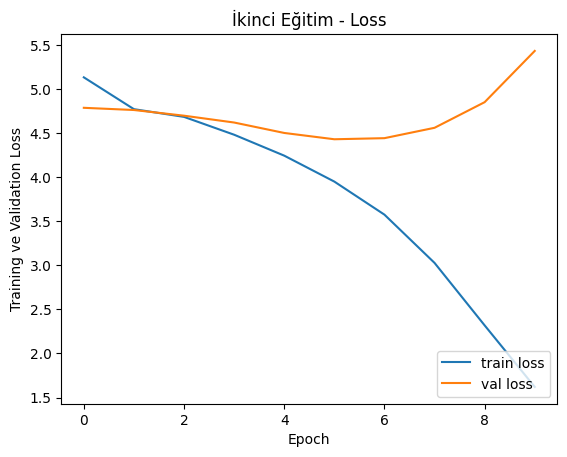

In [26]:
plt.plot(history2.history['loss'], label='train loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title("İkinci Eğitim - Loss")
plt.xlabel('Epoch')
plt.ylabel('Training ve Validation Loss')
plt.legend(loc='lower right')

Üçüncü eğitimde, SGD optimizer parametreleri değiştirilerek epoch sayısı arttırılmıştır.

In [27]:
model3 = keras.models.clone_model(model)
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 32)        0

Optimizer tanımlaması yapılmıştır. learning_rate ve momentum parametrelerinde değişikliğie gidilmiştir.

In [28]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model3.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

Üçüncü model eğitimi (Epoch sayısı 15'e çıkartıldı)

In [29]:
history3 = model3.fit(train_generator, epochs=15, validation_data=val_generator)

Epoch 1/15
64/64 [==============================] - 34s 506ms/step - loss: 4.7929 - accuracy: 0.0094 - val_loss: 4.7860 - val_accuracy: 0.0152
Epoch 2/15
64/64 [==============================] - 32s 498ms/step - loss: 4.7533 - accuracy: 0.0143 - val_loss: 4.7804 - val_accuracy: 0.0186
Epoch 3/15
64/64 [==============================] - 32s 507ms/step - loss: 4.7004 - accuracy: 0.0238 - val_loss: 4.7701 - val_accuracy: 0.0181
Epoch 4/15
64/64 [==============================] - 32s 495ms/step - loss: 4.6399 - accuracy: 0.0323 - val_loss: 4.7337 - val_accuracy: 0.0254
Epoch 5/15
64/64 [==============================] - 31s 489ms/step - loss: 4.5559 - accuracy: 0.0412 - val_loss: 4.7753 - val_accuracy: 0.0108
Epoch 6/15
64/64 [==============================] - 37s 572ms/step - loss: 4.4878 - accuracy: 0.0481 - val_loss: 4.7373 - val_accuracy: 0.0186
Epoch 7/15
64/64 [==============================] - 32s 498ms/step - loss: 4.4268 - accuracy: 0.0573 - val_loss: 4.7577 - val_accuracy: 0.0171

Üçüncü model eğitimi sonuçları (Accuracy ve Loss)

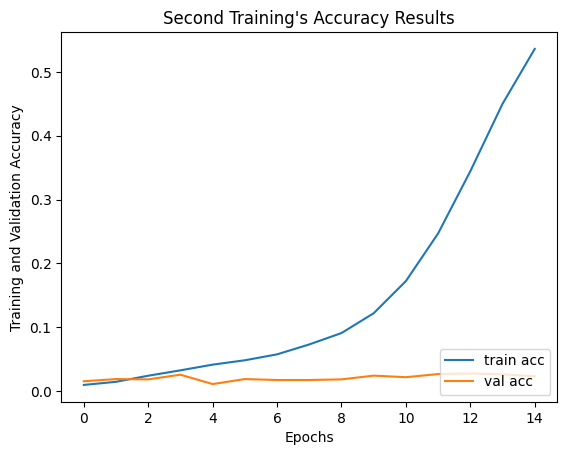

In [30]:
plt.plot(history3.history['accuracy'], label='train acc')
plt.plot(history3.history['val_accuracy'], label='val acc')
plt.title("Second Training's Accuracy Results")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.legend(loc='lower right')

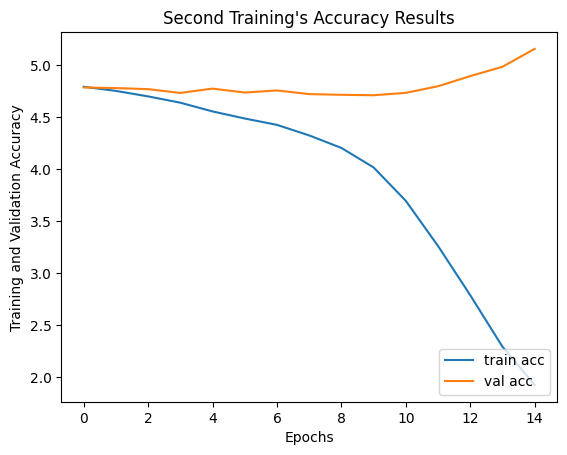

In [31]:
plt.plot(history3.history['loss'], label='train acc')
plt.plot(history3.history['val_loss'], label='val acc')
plt.title("Second Training's Accuracy Results")
plt.xlabel('Epochs')
plt.ylabel('Training and Validation Accuracy')
plt.legend(loc='lower right')